In [92]:
# importing the neccessary people

import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.layers import Dense, Normalization, Dropout
from tensorflow.keras import Sequential

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

tf.config.run_functions_eagerly(True)

In [93]:
# get rid of the warnings

import warnings
warnings.filterwarnings("ignore")

In [94]:
# loading the data

diabetes = load_diabetes(as_frame=False)
X = diabetes.data
y = diabetes.target

X[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613])

In [95]:
# checking the minimum in label
y.min()

25.0

In [96]:
# splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [97]:
# creating the normalizer layer

normalizer = Normalization(axis=-1)
normalizer.adapt(X_train)

In [98]:
# Building the model

model = Sequential([
    normalizer,
    Dense(
        units=128,
        activation='relu',
        kernel_initializer = "uniform",
    ),
    Dropout(0.2),
    Dense(
        units=64,
        activation='relu',
        kernel_initializer = "uniform",
    ),
    Dropout(0.2),
    Dense(
        units=1,
        activation="relu"
    )
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normaliza  (None, 10)                21        
 tion)                                                           
                                                                 
 dense_14 (Dense)            (None, 128)               1408      
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 1)                 65        
                                                      

In [99]:
def r2_metric(y_true, y_pred):
    r2 = r2_score(y_true.numpy(), y_pred.numpy())
    return r2

In [100]:
model.compile(
    optimizer = "adam",
    loss="mean_squared_error",
    metrics=[r2_metric],
)

In [101]:
history = model.fit(
    np.array(X_train),
    np.array(y_train),
    epochs=200,
    verbose=1,
    validation_split=0.2
)

Epoch 1/200
9/9 [==============================] - 1s 119ms/step - loss: 28529.5938 - r2_metric: -4.2474 - val_loss: 29019.0000 - val_r2_metric: -3.0429
Epoch 2/200
9/9 [==============================] - 1s 82ms/step - loss: 28452.5234 - r2_metric: -4.2288 - val_loss: 28912.1465 - val_r2_metric: -3.0280
Epoch 3/200
9/9 [==============================] - 1s 79ms/step - loss: 28302.9062 - r2_metric: -4.2094 - val_loss: 28710.5625 - val_r2_metric: -2.9998
Epoch 4/200
9/9 [==============================] - 1s 85ms/step - loss: 28033.4863 - r2_metric: -4.0957 - val_loss: 28358.2168 - val_r2_metric: -2.9502
Epoch 5/200
9/9 [==============================] - 1s 81ms/step - loss: 27590.5449 - r2_metric: -4.0513 - val_loss: 27788.4766 - val_r2_metric: -2.8700
Epoch 6/200
9/9 [==============================] - 1s 80ms/step - loss: 26891.7480 - r2_metric: -3.9488 - val_loss: 26947.2676 - val_r2_metric: -2.7517
Epoch 7/200
9/9 [==============================] - 1s 84ms/step - loss: 25878.6738 - r2

In [102]:
# Evaluate the model on the test data
mse, r2 = model.evaluate(X_test, y_test)
print(f"Mean Squared Error on Test Data: {mse:.2f}")
print(f"R^2 on Test Data: {r2:.2f}")

3/3 [==============================] - 0s 42ms/step - loss: 2829.9431 - r2_metric: 0.5102
Mean Squared Error on Test Data: 2829.94
R^2 on Test Data: 0.51


In [103]:
# Predict using the trained model
predictions = model.predict(X_test)

print("Sample Predictions:")
for i in range(5):
    print(f"True Value: {y_test[i]}, Predicted Value: {predictions[i][0]:.2f}")

3/3 [==============================] - 0s 5ms/step
Sample Predictions:
True Value: 97.0, Predicted Value: 129.47
True Value: 103.0, Predicted Value: 160.10
True Value: 181.0, Predicted Value: 66.55
True Value: 178.0, Predicted Value: 169.06
True Value: 96.0, Predicted Value: 88.30


In [104]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

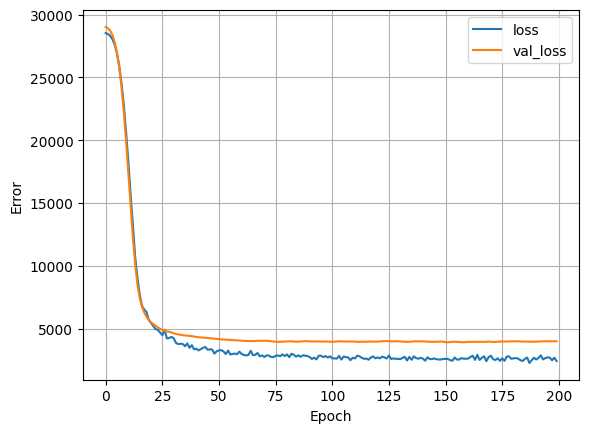

In [105]:
plot_loss(history)

In [106]:
def plot_r2(history):
  plt.plot(history.history['r2_metric'], label='R2 score')
  plt.plot(history.history['val_r2_metric'], label='val r2 score')
  plt.xlabel('Epoch')
  plt.ylabel('R2')
  plt.legend()
  plt.grid(True)

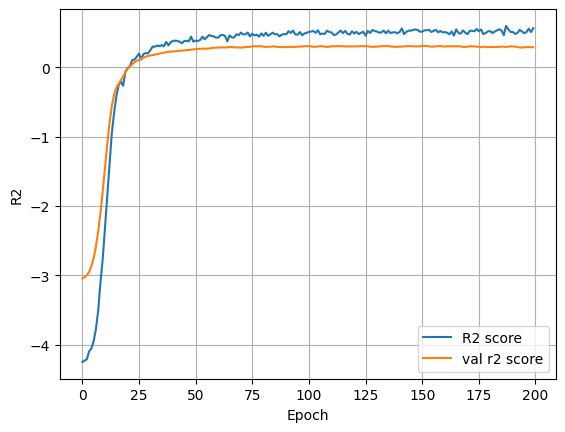

In [107]:
plot_r2(history)

In [108]:
# checking with a linear regression

from sklearn.linear_model import LinearRegression

ln_model = LinearRegression()
ln_model.fit(X_train, y_train)
ln_model.score(X_test, y_test)

0.5718014327762553